# 1.1 Structure

#### Parametric Methods
* Linear Regression
* Bayesian Linear Regression

#### Nonparametric Methods
* Interpolation
* Gaussian Processes


In [121]:
import LinearRegression as LR
import BayesianLinearRegression as BLR
import Interpolation as interp
import GaussianProcessRegression as GP
import matplotlib.pyplot as plt
import numpy as np

In [122]:
import imp

# 2.1 Parametric Models
* Models which the number of parameters are fixed (complexity is fixed)
    * Linear Regresson
    * Bayesian Linear Regression

## 2.2 Linear Regression
* Build a model with a set number of parameters, i.e. parametric
* Example, simple polynomial model
\begin{align}
f(x) = \sum_{j=0}^d w_j x^j
\end{align}

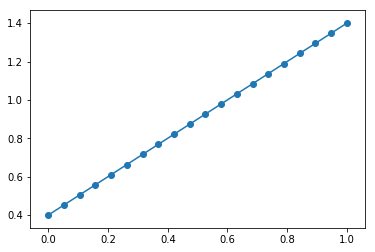

In [123]:
import class_demos
imp.reload(class_demos)
imp.reload(LR)

## Load Function
f1=class_demos.linearmodel()

## Evaluate linear model
N=20
xtrain=np.linspace(0,1,N)
ytrain=f1(xtrain)

## Build Linear Regression Model
d=1                  #degree of polynomial
LRmodel=LR.regress() #Load Model
LRmodel.polybasis(d=d) #set d, the degree of the polynomial, in this case we have a linear model

## Clean Data
LRmodel.traindata(xtrain,ytrain)
LRmodel.trainmodel()
LRmodel.model
LRmodel.plot()

In [124]:
np.sum((LRmodel.eval(xtrain)-f1(xtrain))**2)/len(xtrain)
LRmodel.model

array([[ 0.4],
       [ 1. ]])

## 2.3 Noisy Data
Now imagine the case in which our data is not perfect, i.e., there is some uncertainty due to experimental setup/simulation mesh etc. We can describe observations as realizations from an analytical model with added noise
\begin{align}
y_i = f(x_i) + \epsilon_i
\end{align}

\begin{align}
\epsilon_i \sim N(0,\beta^{-1})
\end{align}

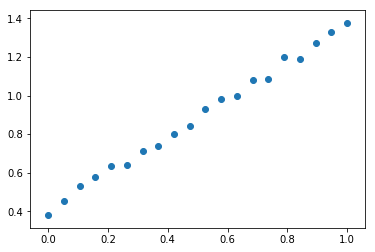

In [144]:
plt.close("all")
## Generate Noisy Data for a linear model
# sigma is the variance, describing how noisy the data is
N=20
sigma=0.001
f2=class_demos.noisylinearmodel(sigma=sigma)
xtrain=np.linspace(0,1,N)
ytrain=f2(xtrain)

## Plot Figure
fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(xtrain,ytrain)
plt.show(fig)

* We can of course still build a regressive model from this data as follows

In [145]:
plt.close("all")
## Build a linear model
LRmodeln=LR.regress() #load model
LRmodeln.polybasis(1) #set degree of polynomial
LRmodeln.traindata(xtrain,ytrain)
LRmodeln.trainmodel()
LRmodeln.model


array([[ 0.40555739],
       [ 0.96418474]])

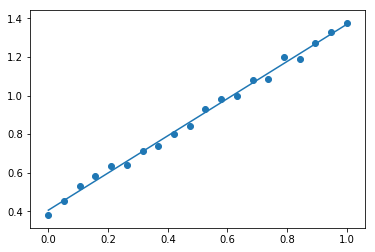

In [146]:
LRmodeln.plot()

In [147]:
np.sum((LRmodel.eval(xtrain)-f2(xtrain))**2)/len(xtrain)

0.00078930179035017665

* I want to be able to put bounds on this model however, that is, quantify how certain is my model for the given data. 
* Bayesian linear regression gives us a framework to do just that.

## 2.4 Bayesian Linear Regression
* $N$ Observations enumerated by $i$ are realizations of an analytical model with added noise
\begin{align}
y_i = f(x_i) + \epsilon_i
\end{align}
\begin{align}
f(x)= \sum_{j=0}^d w_j x^j
\end{align}

* Note, for ease, d=1, for a linear model, can increase degree or use different basis functions
* The realizations from the model are i.i.d. :
    Independent and Identically Distributed, like flipping a coin!
\begin{align}
\epsilon_i \sim \mathcal{N}(0,\beta^{-1})
\end{align}
* This naturally gives rise to the likelihood of the  given training data, with a "known" analytical model
\begin{align}
p(\pmb{y}|\pmb{X},\pmb{w},\beta)= \prod_{i=1}^N \mathcal{N} (y_i|\pmb{w}^T\pmb{x}_i,\beta^{-1})
\end{align}

\begin{align}
\text{where, }\pmb{X}=X_{ij}=x_i^j \text{  (for polynomial basis)}
\end{align}

* By introducing a prior over the weights of the analytical model we can apply bayes theorem than cast the problem as obtaining the posterior distribution of the model weights given the data, and the distributions for the respective likelihood and prior

\begin{align}
\pmb{Posterior}= \frac{\pmb{Likelihood} * \pmb{Prior}}
{\pmb{Marginal Distribution}}
\end{align}

Prior:
\begin{align}
p(\pmb{w}|\alpha) \sim \mathcal{N}(0,\alpha^{-1}\pmb{I})
\end{align}

Posterior:
\begin{align}
p(\pmb{w}|\pmb{y},\pmb{X},\beta,\alpha)= \frac{p(\pmb{y}|\pmb{X},\pmb{w},\beta)p(\pmb{w}|\alpha)}
{p(\pmb{y}|\alpha,\beta)}
\end{align}

Marginal Distribution:
\begin{align}
p(\pmb{y}|\alpha,\beta) = \int p(\pmb{y}|\pmb{X},\pmb{w},\beta)p(\pmb{w}|\alpha) d\pmb{w}
\end{align}

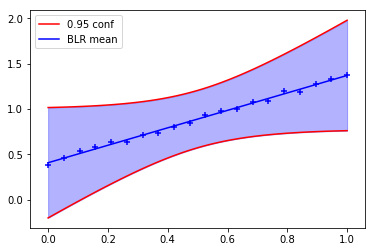

In [148]:
plt.close("all")
## Fitting with BLR
imp.reload(BLR)
BLmodel=BLR.bayesregress() #load model

## Build model
d=1        #degree of polynomial
alpha=0.01 #precision of prior distribution
beta=2     #precision of likelihood

## Choose model type
BLmodel.polybasis(d=d) #choose basis, and degree
BLmodel.traindata(xtrain,ytrain)

## Set Hyper parameters and train
BLmodel.sethyper(alpha=alpha,beta=beta)
BLmodel.trainmodel()
BLmodel.plot()

In [149]:
BLmodel.model

array([[ 0.40648568],
       [ 0.96212492]])

* Notice we introduce two parameters into the mix, $\alpha$ which describes the prior distribution about our weights, and $\beta$ which describes the distribution of the likelihood about the data given the model
* We have to estimate these, but how do we do such?

##  2.5 Empirical Bayes Estimate
* By marginalizing over the weights in the above posterior distribution we can obtain the marginal distribution of the data given the hyper parameters
* This marginal distribution is than used to in conjunction with bayes theorem observing the likelihood of the parameters given the data

\begin{align}
p(\alpha,\beta|\pmb{y}) \propto p(\pmb{y}|\alpha,\beta)p(\alpha,\beta)
\end{align}

* Ultimately the goal becomes maximizing the likelihood of the data given the parameters.
* Due to conjugate distributions analytical forms of marginalization can be found, and the parameters can than be estimated using bayes theorem (maximum likelihood estimation)

In [150]:
plt.close("all")
for i in range(8): BLmodel.optimize()
BLmodel.model

array([[ 0.40568361],
       [ 0.96390482]])

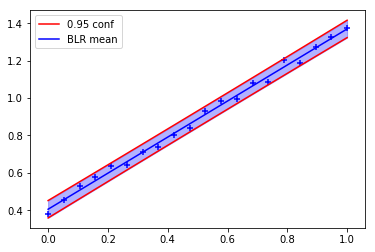

In [151]:
fhat,var=BLmodel.eval(BLmodel.xtrain)
BLmodel.plot()

In [152]:
print(BLmodel.alpha)
print(BLmodel.beta)

[[ 1.49208946]]
2202.20980239


####  BONUS! Connections
* BLR can also be thought of as a form of regularization, (L1 L2 regulatization for e.g.) which conditions the model weights based off of the choosing of the $\alpha$ and $\beta$ hyperparameters, we can see this when we raise the polynomial degree and try to fit higher order models to the noisy linear model. 
* To Observe This
    * Raise the noise of the data in section 2.3
    * Fit a regression model using conventional least square approach with a polynomial of a higher degree (say d=3,4)
    * Fit a BLR model in 2.4 with some initial alpha and beta parameters
    * Experiment with high alpha small beta, high beta small beta
    * Optimize the hyperparameters in section 2.5 than replot

# 3.1 Non parametric models
* Models which the number of parameters grow as the amount of data increases (complexity grows)    
    * Interpolation
    * Gaussian Processes

## 3.2 Interpolation
* Extension of generalized least squares regression requiring that the fitted line passes through the data points.
* e.g. Lagrange Polynomials; formulated by solving coefficients from polynomial model as in 2.2 directly using set of equations equating to training points. Therefore need nth degree polynomial to fit n+1 points (accounting for constant term).
* Explicit form of lagrange interpolation is as below
\begin{align}
f(x)= \sum_{i=0}^{N} y_ic_{i}
\end{align}

\begin{align}
c_{i}= {\displaystyle \prod_{0\leq j \leq N, i \neq j}} \frac{x-x_i}{xi-xj}
\end{align}
$i,j$ enumerates the $N$ available training data

In [155]:
plt.close("all")
import class_demos
imp.reload(interp)

# Set Number of points to probe the function of interest
N=7

xtrain=np.linspace(0,1,N)      #choose training points
f=class_demos.testfuncinterp() #load in mystery function
ytrain=f(xtrain)               #evaluate the mystery function

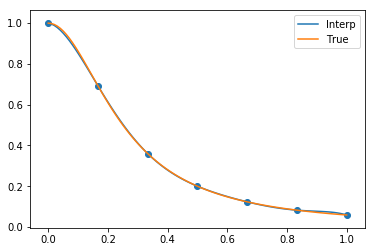

In [156]:
plt.close("all")

#Specify Model
INTmodel=interp.interp()
INTmodel.traindata(xtrain,ytrain)
INTmodel.polybasis()           #use polynomial basis for interpolation

#Plot the true function versus the interpolation between points 
INTmodel.interp()
INTmodel.ftrue=f
INTmodel.plottrue() 

## 3.3 Comparisons to other  interpolation methods
* If we use a radial basis function centered about every single data point as our basis functions for interpolation, we have a natural extension to think of the GP framework

* This can also be thought of as kernel regression using radial basis functions defined about every training point. Although, without the statistical framework methods such as cross validation must be used to estimate the hyperparameter, $l$, (this will not be done here). Also, without the statistical framework we loose the natural interpretation of uncertainty.

* This is also known as a class of linear smoothers called Nadaraya-Watson Estimators (these do not need to interpolate, but for the sake of drawing comparisons we choose basis which interpolate data)

Radial Basis Function:
$k(x,x_i)=exp\frac{(x-x_i)^2}{l}$

$i$, enumerates the $N$ available training data

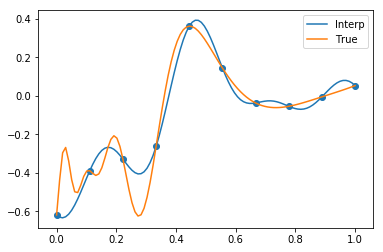

In [157]:
plt.close("all")
import class_demos
imp.reload(interp)
f=class_demos.testfuncgp()

## Specify number of points sampled
n=10    #20 works well
l=0.05  #0.005 works well

## Generate Training data
xtrain=np.linspace(0,1,n)
ytrain=f(xtrain)

## Specify Model, set hyperparameters
INTmodel=interp.interp()
INTmodel.traindata(xtrain,ytrain)
INTmodel.rbfbasis(l=l)
#INTmodel.polybasis()  #we can try this with polynomials as well to see how they do

## Plot model
INTmodel.interp()
INTmodel.ftrue=f
INTmodel.plottrue()

* We can try different interpolation techniques to see how they perform in fitting the unknown function (orange). Try polynomial basis as well as rbfbasis to see how interpolation for this strange unknown function is.

## 3.4 Gaussian Processes
* Non parametric model based on a similarity function
* GPs provides us a tool for nonlinear interpolation which gives us confidence bounds 
* GPs also give us an expression in which we shift our focus to the optimization of hyperparameters

\begin{align}
m (x)= k(x,x_i){C_{ij}}y_j
\end{align}

\begin{align}
\sigma^2 (x)= k(x,x)-k(x,x_i){C_{ij}}k(x,x_j)
\end{align}

\begin{align}
k(x,x_i)=exp \Big( -\frac{||x-x_i||^2}{l} \Big)
\end{align}

\begin{align}
\pmb{K} = K_{ij}=k(x_i,x_j)= exp \Big( -\frac{||x_i-x_j||^2}{l} \Big)
\end{align}

\begin{align}
\pmb{C} = \pmb{K}^{-1} = C_{ij}
\end{align}

$i$,$j$ enumerates the $N$ available training data

NOTE: we chose a very simple covariance/similarity function, $k(x,x')$, others exist with more hyper parameters, and flexibility.

In [162]:
plt.close("all")
import class_demos
imp.reload(GP)

## Specify the number of points sampled
N=7    #start with 7
l=0.3  #start with 0.3

## Generate data
f=class_demos.testfuncgp() #same function from above
xtrain=np.linspace(0,1,N)
ytrain=f(xtrain)

## Specify model
GPmodel=GP.gpprocess()
GPmodel.traindata(xtrain,ytrain)
GPmodel.rbfbasis(l=l) #set length scale parameter and set similarity function
GPmodel.mu=0 #simplify the problem
GPmodel.trainGP()

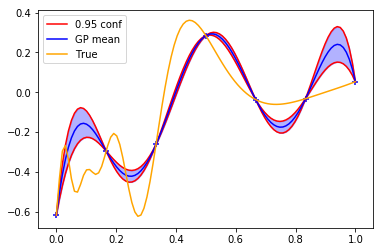

In [159]:
# Plot true function values versus predictions from GP
GPmodel.ftrue=f
GPmodel.plottrue()

## 3.5 Hyperparameter optimization for GPs
* By casting the problem stochasically, a process followed similar from BLR allows us to formulate an expression of the likelihood of the hyperparameters for the given data. We continue to maximize the likelihood with respect to the parameters within the covariance function.

\begin{align*}
 ln\ p(\pmb{y}|\pmb{X},l) = -\frac{1}{2} y_iC_{ij}y_j-\frac{1}{2}ln|\pmb{K}|-\frac{N}{2} ln(2\pi)
\end{align*}

Optimization terminated successfully.
         Current function value: -17.568312
         Iterations: 17
         Function evaluations: 34
Updating Hyperparameters
Training GP


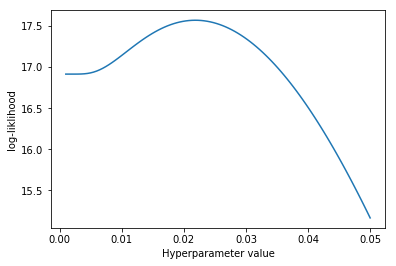

Optimal Solution for hyperparameter l is 0.0219


In [160]:
plt.close("all")
# Maximize the logliklihood with respect the hyperparameter,l
GPmodel.optimize()
print('Optimal Solution for hyperparameter l is %.4f' % GPmodel.l)

In [161]:
GPmodel.l #check for update

0.02185546874999923

* Note: we actually minimize the negative logliklihood for simplicity of algo implementation, this is why function value is negative